In [ ]:
%matplotlib inline


# Plot the decision surface of decision trees trained on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.


First load the copy of the Iris dataset shipped with scikit-learn:



(200,)
(200, 2)


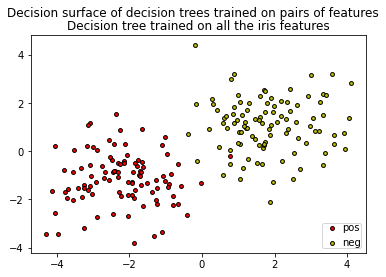

In [47]:
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# Parameters
n_classes = 2
plot_colors = "ryb"
# iris = load_iris()
import numpy as np 
n = 200 
d= 2
x= np.random.randn(n,d)
c1 = np.array([-0.5,-1])
c2 = np.array([0.5,1.0])
y = np.zeros(n,dtype =int)
mid = int(n/2)
x[:mid]+= c1
x[mid:]+= c2
y[:mid]=0
y[mid:]=1
print(y.shape)
print(x.shape)
target_names = ['pos','neg']
n_classes = 2


plt.figure()

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color, label=target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )
plt.title("Decision tree trained on all the iris features")
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")
plt.show()

In [38]:
plot_step = 0.02


# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
# We only take the two corresponding features
# X = iris.data[:, pair]
# y = iris.target
X= x
# Train
# clf = DecisionTreeClassifier().fit(X, y)

gbm = HistGradientBoostingClassifier(max_bins = 3, max_leaf_nodes =7, max_iter= 5)
gbm.fit(X,y)
clf= gbm#.predictors[0]
# Plot the decision boundary


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)
# plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

yps= clf.staged_decision_function(np.c_[xx.ravel(), yy.ravel()])
yp0 = np.zeros(yy.shape)
for yp in yps:
    print(yp.shape)

(200,)
(200, 2)
(265720,)
(265720,)
(265720,)
(265720,)
(265720,)


No handles with labels found to put in legend.


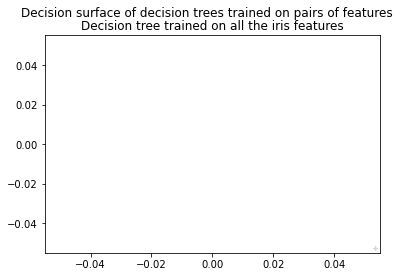

In [41]:

feature_names = ['x','y']
plotidx= 1
target_names = ['red','green']
for yp in yps:
    yp = yp.reshape(xx.shape)
    print(yp.shape)
    print(yp0.shape)
    yp = yp - yp0
    yy = yp>0
    plt.subplot(3, 3, plotidx )
    plotidx +=1
    Z = yy 
    print(Z.shape)
    print(clf.predict(np.c_[xx.ravel(), yy.ravel()]).shape)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    #plt.xlabel(feature_names[pair[0]])
    #plt.ylabel(feature_names[pair[1]])
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color, label=target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
    yp0 = yp


plt.figure()
plt.title("Decision tree trained on all the iris features")
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")
# plt.show()

Display the decision functions of trees trained on all pairs of features.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Display the structure of a single decision tree trained on all the features
together.



In [ ]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()